In [1]:
#Desription: This program uses artificial recurrent neural network called Long Short Term Memory(LSTM) to predict the closing
#            stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [3]:
!pip install pandas-datareader


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!pip install sklearn


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Import the libraries.

import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('fivethirtyeight')

In [11]:
pip uninstall tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
print(tf.__version__)

2.10.0


In [10]:
pip uninstall np

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -U numpy==1.21.4

     ---------------------------------------- 14.0/14.0 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'F:\\Python 3.8\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
np.version.version

'1.21.4'

In [3]:
#Get the stock quote
df = web.DataReader('AAPL',data_source = 'yahoo',start = '2012-01-01',end = '2019-12-17')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519278
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726297
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859332
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838936
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.316818
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.485809
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.389565


In [5]:
#Get the number of rows and columns in the dataset.
df.shape

(2003, 6)

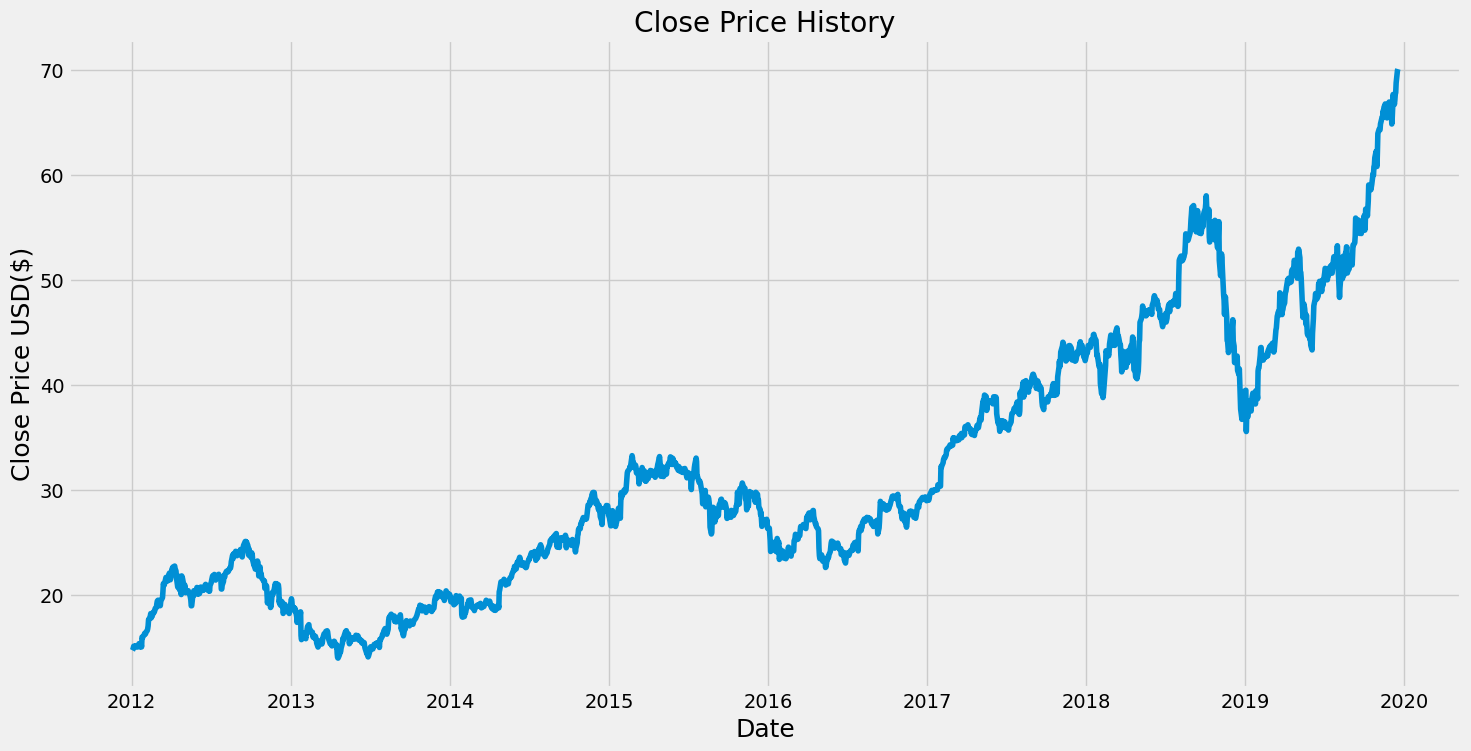

In [30]:
#Visualize the closing price history.
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD($)',fontsize = 18)
plt.show()

In [4]:
#Create a new dataframe with only the closed column.
data = df.filter(['Close'])
#Convert the dataframe to a numpy array.
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1603

In [5]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [6]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data in x_train and y_train
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [7]:
#Convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [8]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [9]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
#Compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [11]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 63s 36ms/step - loss: 7.0967e-04


In [12]:
#Create a testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [13]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [14]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [15]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 29ms/step


In [17]:
#Get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.4134757328033447

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14952\3653160150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


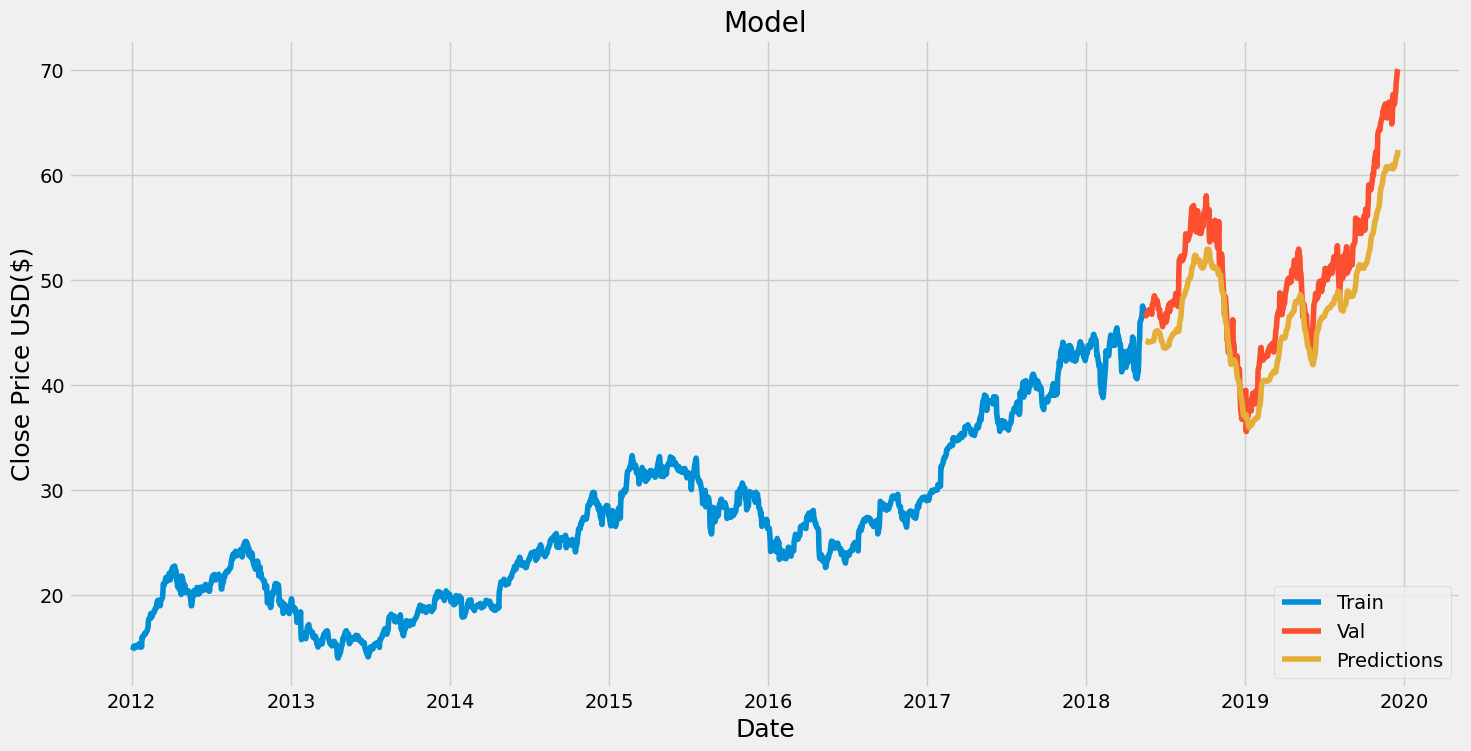

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,44.204842
2018-05-18,46.577499,44.194309
2018-05-21,46.907501,44.130741
2018-05-22,46.790001,44.090328
2018-05-23,47.090000,44.052956
...,...,...
2019-12-11,67.692497,61.137032
2019-12-12,67.864998,61.364079
2019-12-13,68.787498,61.601875


In [21]:
#Get the quote
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end = '2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset into a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 37ms/step
[[62.853664]]


In [22]:
#Get the quote
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
